In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pickle


In [3]:
df = pd.read_csv('C:/Users/priya/Desktop/to/1111/data.csv')

In [4]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [5]:
df.shape

(76014, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [7]:
df.head()

mid        date                  venue               bat_team  \
0    1  18-04-2008  M Chinnaswamy Stadium  Kolkata Knight Riders   
1    1  18-04-2008  M Chinnaswamy Stadium  Kolkata Knight Riders   
2    1  18-04-2008  M Chinnaswamy Stadium  Kolkata Knight Riders   
3    1  18-04-2008  M Chinnaswamy Stadium  Kolkata Knight Riders   
4    1  18-04-2008  M Chinnaswamy Stadium  Kolkata Knight Riders   

                     bowl_team      batsman   bowler  runs  wickets  overs  \
0  Royal Challengers Bangalore   SC Ganguly  P Kumar     1        0    0.1   
1  Royal Challengers Bangalore  BB McCullum  P Kumar     1        0    0.2   
2  Royal Challengers Bangalore  BB McCullum  P Kumar     2        0    0.2   
3  Royal Challengers Bangalore  BB McCullum  P Kumar     2        0    0.3   
4  Royal Challengers Bangalore  BB McCullum  P Kumar     2        0    0.4   

   runs_last_5  wickets_last_5  striker  non-striker  total  
0            1               0        0            0    222  
1            1               0        0            0    222  
2            2               0        0            0    222  
3            2               0        0            0    222  
4            2               0        0            0    222

In [8]:
df.describe()

mid          runs       wickets         overs   runs_last_5  \
count  76014.000000  76014.000000  76014.000000  76014.000000  76014.000000   
mean     308.627740     74.889349      2.415844      9.783068     33.216434   
std      178.156878     48.823327      2.015207      5.772587     14.914174   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%      154.000000     34.000000      1.000000      4.600000     24.000000   
50%      308.000000     70.000000      2.000000      9.600000     34.000000   
75%      463.000000    111.000000      4.000000     14.600000     43.000000   
max      617.000000    263.000000     10.000000     19.600000    113.000000   

       wickets_last_5       striker   non-striker         total  
count    76014.000000  76014.000000  76014.000000  76014.000000  
mean         1.120307     24.962283      8.869287    160.901452  
std          1.053343     20.079752     10.795742     29.246231  
min          0.000000      0.000000      0.000000     67.000000  
25%          0.000000     10.000000      1.000000    142.000000  
50%          1.000000     20.000000      5.000000    162.000000  
75%          2.000000     35.000000     13.000000    181.000000  
max          7.000000    175.000000    109.000000    263.000000

###Data cleaning

* Remove Unwanted columns
* Keeping only consistent teams
* Converting the column 'date' from string into datetime object

In [9]:
##removing unwanted columns
columns_to_remove = ['mid', 'venue','batsman', 'bowler', 'striker', 'non-striker']

print('Before removing unwanted columns: {}'.format(df.shape))
df.drop(labels=columns_to_remove, axis=1, inplace=True)
print('After removing unwanted columns: {}'.format(df.shape))

Before removing unwanted columns: (76014, 15)
After removing unwanted columns: (76014, 9)


In [10]:
df.head()

date               bat_team                    bowl_team  runs  \
0  18-04-2008  Kolkata Knight Riders  Royal Challengers Bangalore     1   
1  18-04-2008  Kolkata Knight Riders  Royal Challengers Bangalore     1   
2  18-04-2008  Kolkata Knight Riders  Royal Challengers Bangalore     2   
3  18-04-2008  Kolkata Knight Riders  Royal Challengers Bangalore     2   
4  18-04-2008  Kolkata Knight Riders  Royal Challengers Bangalore     2   

   wickets  overs  runs_last_5  wickets_last_5  total  
0        0    0.1            1               0    222  
1        0    0.2            1               0    222  
2        0    0.2            2               0    222  
3        0    0.3            2               0    222  
4        0    0.4            2               0    222

In [11]:
df.index

RangeIndex(start=0, stop=76014, step=1)

In [12]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [13]:
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']

In [14]:
consistent_teams

['Kolkata Knight Riders',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Mumbai Indians',
 'Kings XI Punjab',
 'Royal Challengers Bangalore',
 'Delhi Daredevils',
 'Sunrisers Hyderabad']

In [15]:
# Keeping only consistent teams
print('Before removing inconsistent teams: {}'.format(df.shape))
df = df[(df['bat_team'].isin(consistent_teams)) & (df['bowl_team'].isin(consistent_teams))]
print('After removing inconsistent teams: {}'.format(df.shape))

Before removing inconsistent teams: (76014, 9)
After removing inconsistent teams: (53811, 9)


In [16]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
       'Delhi Daredevils', 'Sunrisers Hyderabad'], dtype=object)

In [17]:
df['bowl_team'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Rajasthan Royals', 'Mumbai Indians',
       'Chennai Super Kings', 'Kolkata Knight Riders',
       'Sunrisers Hyderabad'], dtype=object)

In [18]:
# Removing the first 5 overs data in every match
print('Before removing first 5 overs data: {}'.format(df.shape))
df = df[df['overs']>=5.0]
print('After removing first 5 overs data: {}'.format(df.shape))

Before removing first 5 overs data: (53811, 9)
After removing first 5 overs data: (40108, 9)


In [19]:
df.head()

date               bat_team                    bowl_team  runs  \
32  18-04-2008  Kolkata Knight Riders  Royal Challengers Bangalore    61   
33  18-04-2008  Kolkata Knight Riders  Royal Challengers Bangalore    61   
34  18-04-2008  Kolkata Knight Riders  Royal Challengers Bangalore    61   
35  18-04-2008  Kolkata Knight Riders  Royal Challengers Bangalore    61   
36  18-04-2008  Kolkata Knight Riders  Royal Challengers Bangalore    61   

    wickets  overs  runs_last_5  wickets_last_5  total  
32        0    5.1           59               0    222  
33        1    5.2           59               1    222  
34        1    5.3           59               1    222  
35        1    5.4           59               1    222  
36        1    5.5           58               1    222

In [20]:
df.var()

C:\Users\priya\AppData\Local\Temp\ipykernel_12516\1568254755.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


runs              1678.281724
wickets              3.635939
overs               18.688341
runs_last_5        132.337647
wickets_last_5       1.129225
total              889.918132
dtype: float64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40108 entries, 32 to 75888
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            40108 non-null  object 
 1   bat_team        40108 non-null  object 
 2   bowl_team       40108 non-null  object 
 3   runs            40108 non-null  int64  
 4   wickets         40108 non-null  int64  
 5   overs           40108 non-null  float64
 6   runs_last_5     40108 non-null  int64  
 7   wickets_last_5  40108 non-null  int64  
 8   total           40108 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 3.1+ MB


In [22]:
df.isnull().value_counts()

date   bat_team  bowl_team  runs   wickets  overs  runs_last_5  wickets_last_5  total
False  False     False      False  False    False  False        False           False    40108
dtype: int64

In [23]:
df.head()


date               bat_team                    bowl_team  runs  \
32  18-04-2008  Kolkata Knight Riders  Royal Challengers Bangalore    61   
33  18-04-2008  Kolkata Knight Riders  Royal Challengers Bangalore    61   
34  18-04-2008  Kolkata Knight Riders  Royal Challengers Bangalore    61   
35  18-04-2008  Kolkata Knight Riders  Royal Challengers Bangalore    61   
36  18-04-2008  Kolkata Knight Riders  Royal Challengers Bangalore    61   

    wickets  overs  runs_last_5  wickets_last_5  total  
32        0    5.1           59               0    222  
33        1    5.2           59               1    222  
34        1    5.3           59               1    222  
35        1    5.4           59               1    222  
36        1    5.5           58               1    222

**Find the correlation Between Different Features**

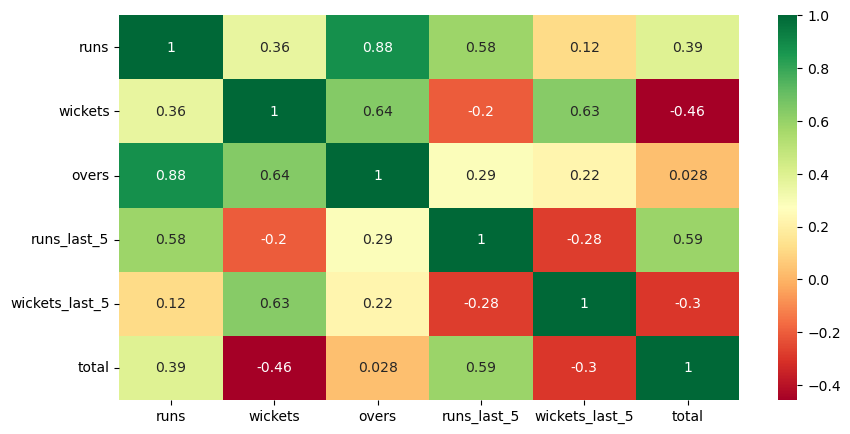

In [24]:
# Selecting correlated features using Heatmap
import matplotlib.pyplot as plt
import seaborn as sns

# Get correlation of all the features of the dataset
corr_matrix = df.corr()
top_corr_features = corr_matrix.index

# Plotting the heatmap
plt.figure(figsize=(10,5))
g = sns.heatmap(data=df[top_corr_features].corr(), annot=True, cmap='RdYlGn')

In [25]:
from datetime import datetime
print("Before converting 'date' column from string to datetime object: {}".format(type(df.iloc[0,0])))
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%d-%m-%Y'))

print("After converting 'date' column from string to datetime object: {}".format(type(df.iloc[0,0])))


Before converting 'date' column from string to datetime object: <class 'str'>
After converting 'date' column from string to datetime object: <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [26]:
df['date'].dtype


dtype('<M8[ns]')

In [27]:
df.columns

Index(['date', 'bat_team', 'bowl_team', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'total'],
      dtype='object')

In [28]:

# Converting categorical features using OneHotEncoding method
encoded_df = pd.get_dummies(data=df, columns=['bat_team', 'bowl_team'])
encoded_df.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [29]:
# Rearranging the columns
encoded_df = encoded_df[['date', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
              'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
              'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
              'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
              'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
              'bowl_team_Royal Challengers Bangalore', 'bowl_team_Sunrisers Hyderabad',
              'overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5', 'total']]

In [30]:
encoded_df.head()

date  bat_team_Chennai Super Kings  bat_team_Delhi Daredevils  \
32 2008-04-18                             0                          0   
33 2008-04-18                             0                          0   
34 2008-04-18                             0                          0   
35 2008-04-18                             0                          0   
36 2008-04-18                             0                          0   

    bat_team_Kings XI Punjab  bat_team_Kolkata Knight Riders  \
32                         0                               1   
33                         0                               1   
34                         0                               1   
35                         0                               1   
36                         0                               1   

    bat_team_Mumbai Indians  bat_team_Rajasthan Royals  \
32                        0                          0   
33                        0                          0   
34                        0                          0   
35                        0                          0   
36                        0                          0   

    bat_team_Royal Challengers Bangalore  bat_team_Sunrisers Hyderabad  \
32                                     0                             0   
33                                     0                             0   
34                                     0                             0   
35                                     0                             0   
36                                     0                             0   

    bowl_team_Chennai Super Kings  ...  bowl_team_Mumbai Indians  \
32                              0  ...                         0   
33                              0  ...                         0   
34                              0  ...                         0   
35                              0  ...                         0   
36                              0  ...                         0   

    bowl_team_Rajasthan Royals  bowl_team_Royal Challengers Bangalore  \
32                           0                                      1   
33                           0                                      1   
34                           0                                      1   
35                           0                                      1   
36                           0                                      1   

    bowl_team_Sunrisers Hyderabad  overs  runs  wickets  runs_last_5  \
32                              0    5.1    61        0           59   
33                              0    5.2    61        1           59   
34                              0    5.3    61        1           59   
35                              0    5.4    61        1           59   
36                              0    5.5    61        1           58   

    wickets_last_5  total  
32               0    222  
33               1    222  
34               1    222  
35               1    222  
36               1    222  

[5 rows x 23 columns]

In [31]:
df.head()

date               bat_team                    bowl_team  runs  \
32 2008-04-18  Kolkata Knight Riders  Royal Challengers Bangalore    61   
33 2008-04-18  Kolkata Knight Riders  Royal Challengers Bangalore    61   
34 2008-04-18  Kolkata Knight Riders  Royal Challengers Bangalore    61   
35 2008-04-18  Kolkata Knight Riders  Royal Challengers Bangalore    61   
36 2008-04-18  Kolkata Knight Riders  Royal Challengers Bangalore    61   

    wickets  overs  runs_last_5  wickets_last_5  total  
32        0    5.1           59               0    222  
33        1    5.2           59               1    222  
34        1    5.3           59               1    222  
35        1    5.4           59               1    222  
36        1    5.5           58               1    222

Distribution of the total runs in the dataset
183    0.023312
165    0.023212
163    0.020894
171    0.018774
164    0.018575
         ...   
103    0.001820
81     0.001621
70     0.001521
106    0.001247
97     0.001072
Name: total, Length: 128, dtype: float64


C:\Users\priya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

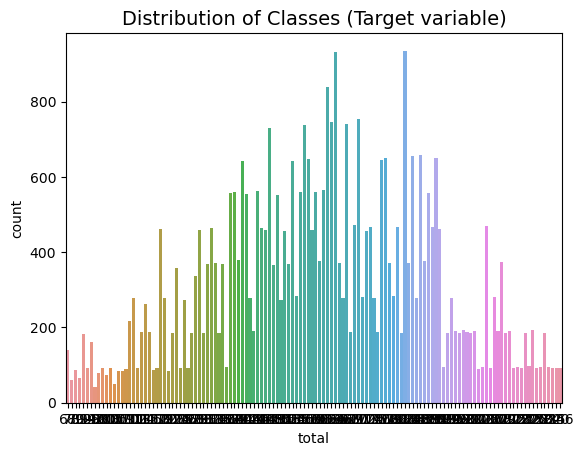

In [32]:
print('Distribution of the total runs in the dataset')
print(encoded_df['total'].value_counts()/len(df))

sns.countplot('total', data=encoded_df)
plt.title('Distribution of Classes (Target variable)',fontsize=14)
plt.show

Distribution of the total runs in the dataset
183    0.023312
165    0.023212
163    0.020894
171    0.018774
164    0.018575
         ...   
103    0.001820
81     0.001621
70     0.001521
106    0.001247
97     0.001072
Name: total, Length: 128, dtype: float64


C:\Users\priya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

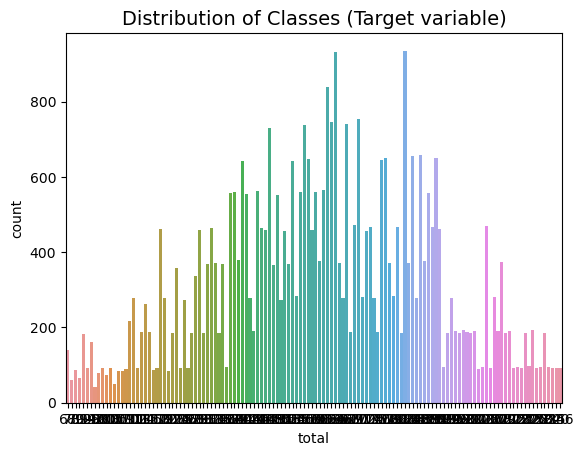

In [33]:
print('Distribution of the total runs in the dataset')
print(df['total'].value_counts()/len(df))

sns.countplot('total', data=df)
plt.title('Distribution of Classes (Target variable)', fontsize=14)
plt.show

In [34]:
X = encoded_df.drop(labels='total', axis=1) #### INPUT VARIABLE/Independent


In [35]:
y = encoded_df['total'] ###TARGET VARIABLE/Dependent


In [36]:
#X = encoded_df(['date','bat_team','bowl_team','runs','wickets','overs','runs_last_5','wickets_last_5'])
#y = encoded_df['total']

In [37]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=1)




In [38]:
#checking shape
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(26872, 22)
(13236, 22)
(26872,)
(13236,)


In [39]:
# Removing the 'date' column
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

In [40]:

# Splitting the data into train and test set
#X_train = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year <= 2012]
#X_test = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year >= 2013]

#y_train = encoded_df[encoded_df['date'].dt.year <= 2012]['total'].values
#y_test = encoded_df[encoded_df['date'].dt.year >= 2013]['total'].values

# Removing the 'date' column
#X_train.drop(labels='date', axis=True, inplace=True)
#X_test.drop(labels='date', axis=True, inplace=True)

#print("Training set: {} and Test set: {}".format(X_train.shape, X_test.shape))

In [41]:
display("X_train", X_train.head(1))
display("X_test", X_test.head(1))

'X_train'

bat_team_Chennai Super Kings  bat_team_Delhi Daredevils  \
21136                             1                          0   

       bat_team_Kings XI Punjab  bat_team_Kolkata Knight Riders  \
21136                         0                               0   

       bat_team_Mumbai Indians  bat_team_Rajasthan Royals  \
21136                        0                          0   

       bat_team_Royal Challengers Bangalore  bat_team_Sunrisers Hyderabad  \
21136                                     0                             0   

       bowl_team_Chennai Super Kings  bowl_team_Delhi Daredevils  ...  \
21136                              0                           0  ...   

       bowl_team_Kolkata Knight Riders  bowl_team_Mumbai Indians  \
21136                                1                         0   

       bowl_team_Rajasthan Royals  bowl_team_Royal Challengers Bangalore  \
21136                           0                                      0   

       bowl_team_Sunrisers Hyderabad  overs  runs  wickets  runs_last_5  \
21136                              0   11.2    84        2           38   

       wickets_last_5  
21136               1  

[1 rows x 21 columns]

'X_test'

bat_team_Chennai Super Kings  bat_team_Delhi Daredevils  \
38893                             0                          0   

       bat_team_Kings XI Punjab  bat_team_Kolkata Knight Riders  \
38893                         0                               0   

       bat_team_Mumbai Indians  bat_team_Rajasthan Royals  \
38893                        0                          0   

       bat_team_Royal Challengers Bangalore  bat_team_Sunrisers Hyderabad  \
38893                                     1                             0   

       bowl_team_Chennai Super Kings  bowl_team_Delhi Daredevils  ...  \
38893                              0                           0  ...   

       bowl_team_Kolkata Knight Riders  bowl_team_Mumbai Indians  \
38893                                0                         1   

       bowl_team_Rajasthan Royals  bowl_team_Royal Challengers Bangalore  \
38893                           0                                      0   

       bowl_team_Sunrisers Hyderabad  overs  runs  wickets  runs_last_5  \
38893                              0   17.6   132        5           49   

       wickets_last_5  
38893               0  

[1 rows x 21 columns]

##Model Building

In [42]:
models = dict()


In [43]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, accuracy_score,r2_score
from sklearn import metrics


In [44]:
#from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error

# Compute the metrics and return the results
def Compute_Metrics(y_true, y_pred):

    #1. MAE
    mae = mean_absolute_error(y_true, y_pred)
    #2. MSE
    mse = mean_squared_error(y_true, y_pred)
    #3. RMSE
    rmse = np.sqrt(mean_squared_error(y_true,y_pred))

    try:
    #5. MSLE
      msle = mean_squared_log_error(y_true, y_pred)
      metrics_dict = {'MAE' : [mae], 'MSE' : [mse], 'RMSE' : [rmse], 'MSLE' : [msle]}
    except:
      metrics_dict = {'MAE' : [mae], 'MSE' : [mse], 'RMSE' : [rmse], 'MSLE' : [0]}

    # Create a DataFrame and storing all the metrics
    metrics_df = pd.DataFrame(data=metrics_dict) # Creating the DataFrame
    
    return  metrics_df# formatting the DataFrame to return results only upto 4 decimal places

###Linear Regression

In [45]:
#1. Linear Regression Model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()


In [46]:
##fit the model
lr.fit(X_train,y_train)

LinearRegression()

In [47]:
# Make predictions on the test set.
y_pred_linear = lr.predict(X_test)


In [48]:
# Evaluate the train and test score.
train_score_linreg = str(lr.score(X_train, y_train) * 100)
test_score_linreg = str(lr.score(X_test, y_test) * 100)
print(f'Train Score : {train_score_linreg[:5]}%\nTest Score : {test_score_linreg[:5]}%')
models["lr"] = test_score_linreg

Train Score : 65.73%
Test Score : 66.27%


In [49]:

# Compute metrics
lr_metrics = Compute_Metrics(y_test, y_pred_linear)

C:\Users\priya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total', ylabel='Density'>

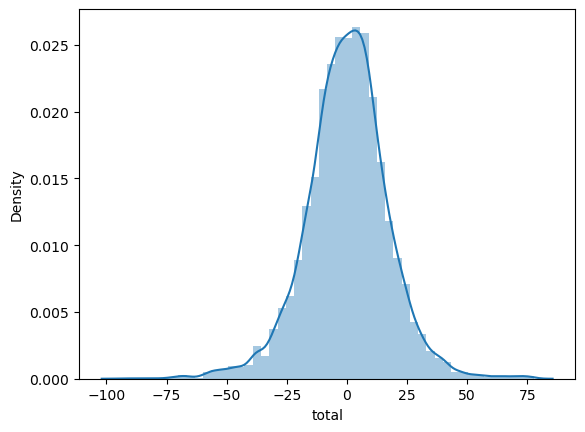

In [50]:
# plotting our fit
import seaborn as sns
sns.distplot(y_test-y_pred_linear)

In [51]:
print("---- Linear Regression - Model Evaluation ----")

lr_metrics

---- Linear Regression - Model Evaluation ----


MAE         MSE       RMSE      MSLE
0  12.961702  297.738701  17.255107  0.013416

In [52]:
## It is giving gaussian distribution it means regression is it tells that it is giving the good results.
# No need for RandomizedSearchCV because Linear Regression requires almost no Hyperparameter Tuning


In [53]:
#print(metrics.classification_report(y_test,y_pred_linear))

In [54]:
#from sklearn.model_selection import RandomizedSearchCV


##Decission Tree

In [55]:
#2. Decision Tree
from sklearn.tree import DecisionTreeRegressor

# Model Object
dt = DecisionTreeRegressor()



In [56]:
##fit the model
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [57]:
# Make predictions on the test set 
y_pred_dt = dt.predict(X_test) 

In [58]:
# Evaluate the train and test score.
train_score_tree = str(dt.score(X_train, y_train) * 100)
test_score_tree = str(dt.score(X_test, y_test) * 100)
print(f'Train Score : {train_score_tree[:5]}%\nTest Score : {test_score_tree[:5]}%')
models["dt"] = test_score_tree

Train Score : 99.99%
Test Score : 83.39%


C:\Users\priya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total', ylabel='Density'>

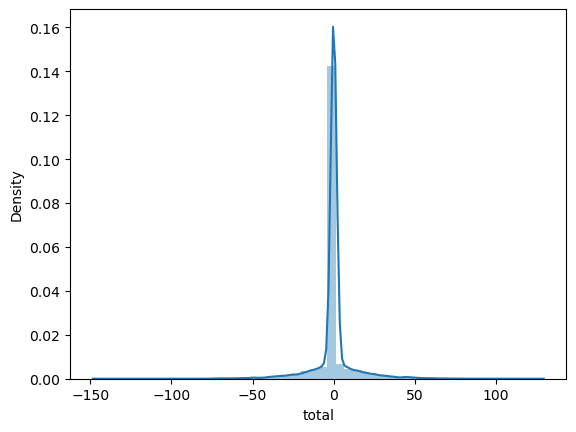

In [59]:
# plotting our fit
import seaborn as sns
sns.distplot(y_test-y_pred_dt)

In [60]:


# Compute metrics
dt_metrics = Compute_Metrics(y_test, y_pred_dt)

In [61]:
print("---- Decision Tree Regression - Model Evaluation ----")
dt_metrics

---- Decision Tree Regression - Model Evaluation ----


MAE         MSE       RMSE      MSLE
0  4.632933  146.620335  12.108688  0.005944

In [62]:
# 3. Random Forest
from sklearn.ensemble import RandomForestRegressor

# Model Object
rf_reg = RandomForestRegressor()


In [63]:
# Fit the model
rf_reg.fit(X_train, y_train)

RandomForestRegressor()

In [64]:
# Make predictions on the test set 
y_pred_rf_reg = rf_reg.predict(X_test)

In [65]:
y_pred_rf_reg

array([156.68, 175.22, 146.77, ..., 162.92, 190.69, 133.19])

In [66]:
# Evaluate Model
train_score_forest = str(rf_reg.score(X_train, y_train)*100)
test_score_forest = str(rf_reg.score(X_test, y_test)*100)
print(f'Train Score : {train_score_forest[:5]}%\nTest Score : {test_score_forest[:5]}%')
models["rf_reg"] = test_score_forest

Train Score : 98.87%
Test Score : 92.60%


C:\Users\priya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total', ylabel='Density'>

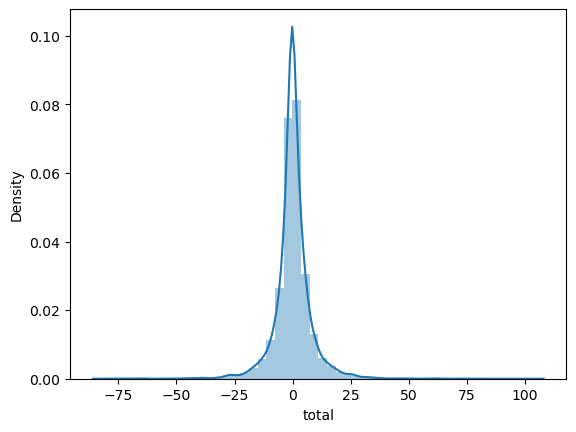

In [67]:
# plotting our fit
import seaborn as sns
sns.distplot(y_test-y_pred_rf_reg)

In [68]:

# Compute metrics
rf_reg_metrics = Compute_Metrics(y_test, y_pred_rf_reg)

In [69]:
print("---- Random Forest Regression - Model Evaluation ----")
rf_reg_metrics

---- Random Forest Regression - Model Evaluation ----


MAE        MSE      RMSE      MSLE
0  4.926913  65.325162  8.082398  0.002728

KNN

In [70]:
## 4. KNN KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor

# Model object
knn = KNeighborsRegressor()



In [71]:
# Fit the model
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [72]:
# Make predictions on the test set 
y_pred_knn = knn.predict(X_test)

In [73]:
train_score_knn = str(knn.score(X_train, y_train)*100)
test_score_knn = str(knn.score(X_test, y_test)*100)
print(f'Train Score : {train_score_knn[:5]}%\nTest Score : {test_score_knn[:5]}%')
models["knn"] = test_score_knn

Train Score : 85.08%
Test Score : 75.88%


C:\Users\priya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total', ylabel='Density'>

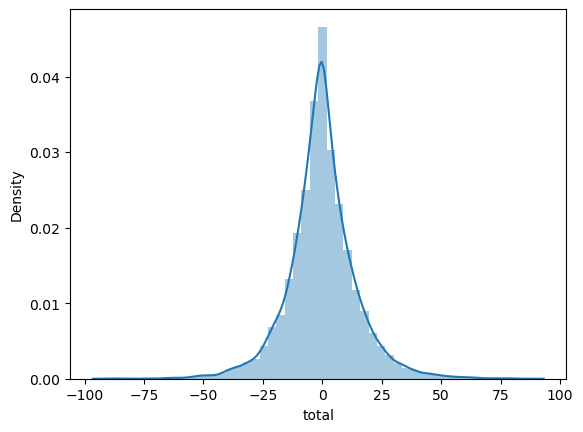

In [74]:
# plotting our fit
import seaborn as sns
sns.distplot(y_test-y_pred_knn)

In [75]:

# Compute metrics
knn_metrics = Compute_Metrics(y_test, y_pred_knn)

In [76]:
print("---- KNN Regression - Model Evaluation ----")
knn_metrics

---- KNN Regression - Model Evaluation ----


MAE         MSE       RMSE      MSLE
0  10.279692  212.856682  14.589609  0.008923

XG Boost

In [77]:
# 5. XG Boost
from xgboost import XGBRegressor

# Model object
xgb_reg = XGBRegressor()



In [78]:
# Fit the model
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [79]:
# Make predictions on the test set
y_pred_xgb_reg = xgb_reg.predict(X_test)

In [80]:
train_score_xgb_reg = str(xgb_reg.score(X_train, y_train)*100)
test_score_xgb_reg = str(xgb_reg.score(X_test, y_test)*100)
print(f'Train Score : {train_score_xgb_reg[:5]}%\nTest Score : {test_score_xgb_reg[:5]}%')
models["xgb_reg"] = test_score_xgb_reg

Train Score : 89.12%
Test Score : 84.59%


In [81]:
# Compute metrics
xgb_reg_metrics = Compute_Metrics(y_test, y_pred_xgb_reg)

C:\Users\priya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total', ylabel='Density'>

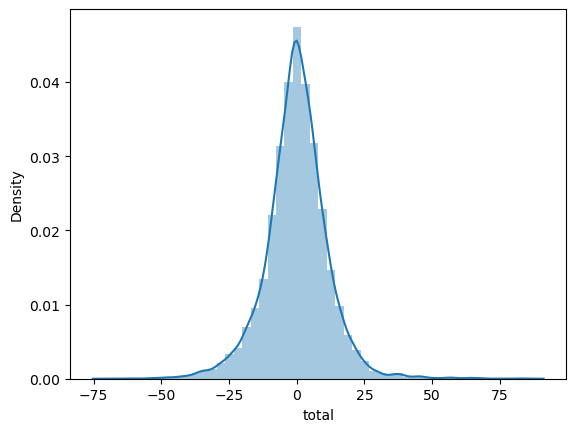

In [82]:
# plotting our fit
import seaborn as sns
sns.distplot(y_test-y_pred_xgb_reg)

In [83]:
print("---- XGB Regression - Model Evaluation ----")
xgb_reg_metrics

---- XGB Regression - Model Evaluation ----


MAE         MSE       RMSE      MSLE
0  8.389877  135.981081  11.661093  0.005712

In [84]:
# Create a list of all the model metric dfs
metrics_df = pd.concat([lr_metrics, dt_metrics, rf_reg_metrics,xgb_reg_metrics,knn_metrics])
metrics_df['Models'] = ['LR', 'DT', 'RF','XGB','KNN']
metrics_df.set_index('Models', inplace=True)

In [85]:
transposed_metric_df = metrics_df.transpose() # Transpose the dataframe


In [86]:
transposed_metric_df


Models          LR          DT         RF         XGB         KNN
MAE      12.961702    4.632933   4.926913    8.389877   10.279692
MSE     297.738701  146.620335  65.325162  135.981081  212.856682
RMSE     17.255107   12.108688   8.082398   11.661093   14.589609
MSLE      0.013416    0.005944   0.002728    0.005712    0.008923

In [87]:
metrics_df.style.format('{:.2f}') #Format the dataframe


In [88]:
# Plot the results on a grouped bar graph using plotly
from plotly import graph_objects as go

# Initialise the figure
fig = go.Figure(
            data=[
                  # 1. Plotting MAE
                  go.Bar(
                        name = 'MAE',
                        x=metrics_df.index,
                        y=metrics_df['MAE'],
                        offsetgroup=0
                  ),
                  # 2. Plotting MSE
                  go.Bar(
                        name = 'MSE',
                        x=metrics_df.index,
                        y=metrics_df['MSE'],
                        offsetgroup=1
                  ),
                  # 3. Plotting RMSE
                  go.Bar(
                        name = 'RMSE',
                        x=metrics_df.index,
                        y=metrics_df['RMSE'],
                        offsetgroup=2
                  ),
                  # 4. Plotting MSLE
                  go.Bar(
                        name = 'MSLE',
                        x=metrics_df.index,
                        y=metrics_df['MSLE'],
                        offsetgroup=3
                  )
            ],
            # Updating the layout
            layout=go.Layout(
                title='Metric Comparison of Various Models'
            )
)
fig.show()

# for selecting the best model


C:\Users\priya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:>

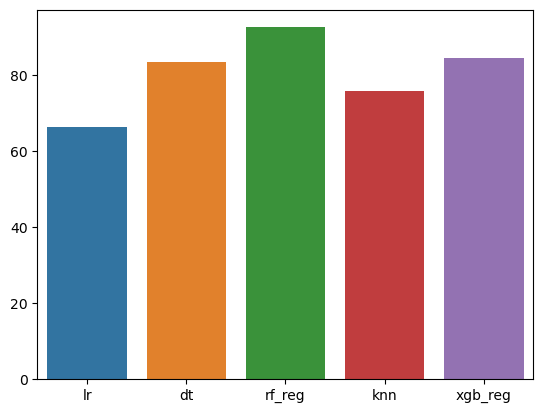

In [89]:
from seaborn import barplot
model_names = list(models.keys())
accuracy = list(map(float, models.values()))
barplot(model_names, accuracy)

###INSIGHTS:
 ### As , we see Random forest regressor performing Best among the four regressor models so we select Random Forest regressor  model for boosting its performance  using adaboost algorithm

###AdaBoost

In [90]:
# First create the base model to tune
#from sklearn.ensemble import AdaBoostRegressor
#adb_regressor = AdaBoostRegressor(estimator=rf_reg, n_estimators=100)
#adb_regressor.fit(X_train, y_train)

In [91]:
# Predicting results
#y_pred_adb = adb_regressor.predict(X_test)###Testing the model.
# Compute metrics
#adb_regressor_metrics = Compute_Metrics(y_test, y_pred_adb)

In [92]:
#print("---- AdaBoost Regression - Model Evaluation ----")
#adb_regressor_metrics

In [93]:
#r2_score(y_test,y_pred_adb)


##INSIGHT:

###As, we can see that using adbasoot can't increase the model performnace so we use Random forest regressor model for further. 

###Manual Predictions
* Model trained on the 2/3 of data.
*  Model tested on 1/3 of data.
* Model predicts on furthr seasons data

In [94]:
## yha tak thik hai...

In [95]:
def predict_score(batting_team='Chennai Super Kings', bowling_team='Mumbai Indians', overs=5.1, runs=50, wickets=0, runs_in_prev_5=50, wickets_in_prev_5=0):
  temp_array = list()

  # Batting Team
  if batting_team == 'Chennai Super Kings':
    temp_array = temp_array + [1,0,0,0,0,0,0,0]
  elif batting_team == 'Delhi Daredevils':
    temp_array = temp_array + [0,1,0,0,0,0,0,0]
  elif batting_team == 'Kings XI Punjab':
    temp_array = temp_array + [0,0,1,0,0,0,0,0]
  elif batting_team == 'Kolkata Knight Riders':
    temp_array = temp_array + [0,0,0,1,0,0,0,0]
  elif batting_team == 'Mumbai Indians':
    temp_array = temp_array + [0,0,0,0,1,0,0,0]
  elif batting_team == 'Rajasthan Royals':
    temp_array = temp_array + [0,0,0,0,0,1,0,0]
  elif batting_team == 'Royal Challengers Bangalore':
    temp_array = temp_array + [0,0,0,0,0,0,1,0]
  elif batting_team == 'Sunrisers Hyderabad':
    temp_array = temp_array + [0,0,0,0,0,0,0,1]

  # Bowling Team
  if bowling_team == 'Chennai Super Kings':
    temp_array = temp_array + [1,0,0,0,0,0,0,0]
  elif bowling_team == 'Delhi Daredevils':
    temp_array = temp_array + [0,1,0,0,0,0,0,0]
  elif bowling_team == 'Kings XI Punjab':
    temp_array = temp_array + [0,0,1,0,0,0,0,0]
  elif bowling_team == 'Kolkata Knight Riders':
    temp_array = temp_array + [0,0,0,1,0,0,0,0]
  elif bowling_team == 'Mumbai Indians':
    temp_array = temp_array + [0,0,0,0,1,0,0,0]
  elif bowling_team == 'Rajasthan Royals':
    temp_array = temp_array + [0,0,0,0,0,1,0,0]
  elif bowling_team == 'Royal Challengers Bangalore':
    temp_array = temp_array + [0,0,0,0,0,0,1,0]
  elif bowling_team == 'Sunrisers Hyderabad':
    temp_array = temp_array + [0,0,0,0,0,0,0,1]

  # Overs, Runs, Wickets, Runs_in_prev_5, Wickets_in_prev_5
  temp_array = temp_array + [overs, runs, wickets, runs_in_prev_5, wickets_in_prev_5]

  # Converting into numpy array
  temp_array = np.array([temp_array])

  # Prediction
  return int(rf_reg.predict(temp_array)[0])

### Prediction 1
* Date: 16th April 2018
* IPL : Season 11
*  Match number: 13
*  Teams: Kolkata Knight Riders vs. Delhi Daredevils
*  First Innings final score: 200/9

In [96]:
final_score = predict_score(batting_team='Kolkata Knight Riders', bowling_team='Delhi Daredevils', overs=8.4, runs=89, wickets=2, runs_in_prev_5=70, wickets_in_prev_5=1)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 156 to 171


C:\Users\priya\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



###Prediction 2
* Date: 7th May 2018
* IPL : Season 11
* Match number: 39
* Teams: Sunrisers Hyderabad vs. Royal Challengers Bangalore
* First Innings final score: 146/10

In [97]:
final_score = predict_score(batting_team='Sunrisers Hyderabad', bowling_team='Royal Challengers Bangalore', overs=10.5, runs=67, wickets=3, runs_in_prev_5=29, wickets_in_prev_5=1)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 145 to 160


C:\Users\priya\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



###Prediction 3
* Date: 17th May 2018
* IPL : Season 11
* Match number: 50
* Teams: Mumbai Indians vs. Kings XI Punjab
* First Innings final score: 186/8

In [98]:
final_score = predict_score(batting_team='Mumbai Indians', bowling_team='Kings XI Punjab', overs=14.1, runs=136, wickets=4, runs_in_prev_5=50, wickets_in_prev_5=0)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))


The final predicted score (range): 189 to 204


C:\Users\priya\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



###Prediction 4
*  Date: 10th May 2019
* IPL : Season 12
* Match number: 59 (Eliminator)
* Teams: Delhi Daredevils vs. Chennai Super Kings
* First Innings final score: 147/9

In [99]:

final_score = predict_score(batting_team='Delhi Daredevils', bowling_team='Chennai Super Kings', overs=10.2, runs=68, wickets=3, runs_in_prev_5=29, wickets_in_prev_5=1)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 137 to 152


C:\Users\priya\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



###Prediction 5
* Date: 14th April 2019
* IPL : Season 12
* Match number: 30
* Teams: Sunrisers Hyderabad vs. Delhi Daredevils
* First Innings final score: 155/7

In [100]:

final_score = predict_score(batting_team='Delhi Daredevils', bowling_team='Sunrisers Hyderabad', overs=11.5, runs=98, wickets=3, runs_in_prev_5=41, wickets_in_prev_5=1)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 167 to 182


C:\Users\priya\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



In [101]:
# Creating a pickle file for the classifier
filename = 'first-innings-score-lr-model.pkl'
pickle.dump(rf_reg, open(filename, 'wb'))

In [102]:
#pip install jinja2


In [103]:
#pip install Flask>=2.2.2


In [104]:
#pip install Jinja2==3.0.3


In [105]:
#from markupsafe import escape


In [106]:
#from flask import Flask,render_template,request

In [107]:
#from jinja2 import escape